# Student Activity: SVM for Classification

In this activity, you will:
1. Load and explore the Iris dataset from the UCI Machine Learning Repository.
2. Preprocess the data for SVM training.
3. Train an SVM model for classification.
4. Evaluate the model using a classification report.
5. Predict the class of a new record.

### Dataset: Iris Dataset
The Iris dataset contains measurements of iris flowers, with the goal of classifying the species (Setosa, Versicolor, or Virginica).

**Features:**
- Sepal length
- Sepal width
- Petal length
- Petal width

**Target Variable:**
- Species (Setosa, Versicolor, Virginica)

## Step 1: Import Libraries
First, we will import the necessary Python libraries for data manipulation, visualization, and machine learning.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the Dataset
We will use the Iris dataset, which is available directly from the `sklearn` library. Let’s load the dataset and explore its structure.

In [2]:
# Load the Iris dataset
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='species')  # Target variable (0, 1, 2)

# Display dataset shape
print("Feature Data Shape:", X.shape)
print("Target Data Shape:", y.shape)

# Display the first few rows of features
X.head()

Feature Data Shape: (150, 4)
Target Data Shape: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Mapping Target Values
The target values (`species`) are numerical (0, 1, 2). Let's map them to their corresponding class names for better interpretability.

In [3]:
# Map target values to class names
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
y_mapped = y.map(species_map)

# Display the first few rows of the mapped target variable
y_mapped.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: species, dtype: object

## Step 3: Data Preprocessing
1. Split the data into training and testing sets (80% training, 20% testing).
2. Scale the feature data using `StandardScaler` to normalize the values.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train_scaled.shape)
print("Testing set size:", X_test_scaled.shape)

Training set size: (120, 4)
Testing set size: (30, 4)


## Step 4: Train the SVM Model
Train an SVM model with the RBF kernel, which is effective for non-linear classification tasks.

In [6]:
# Train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

SVC(C=1)

## Step 5: Evaluate the Model
1. Generate predictions on the test set.
2. Compute the confusion matrix and classification report.
3. Interpret the evaluation metrics.

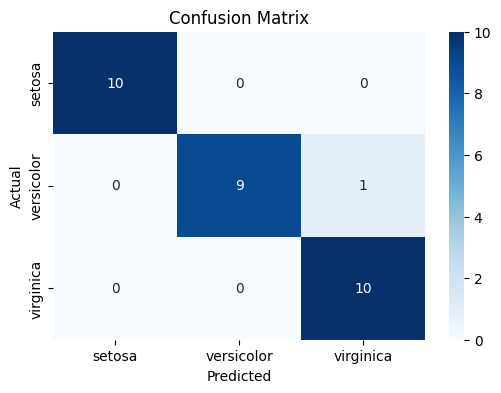

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [7]:
# Generate predictions
y_pred = svm_model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

### How to Interpret the Evaluation Metrics
- **Precision:** Out of all predicted positive instances, how many were correct?
- **Recall:** Out of all actual positive instances, how many were correctly predicted?
- **F1-Score:** The harmonic mean of precision and recall.
- **Support:** The number of true instances for each class.

## Step 6: Predict a New Record
Use the trained model to predict the class of a new record. Provide a new set of feature values for prediction.

In [8]:
# New record for prediction (example values)
new_record = [[5.1, 3.5, 1.4, 0.2]]  # Sepal length, Sepal width, Petal length, Petal width

# Convert new record to a DataFrame with the same feature names
new_record_df = pd.DataFrame(new_record, columns=X.columns)

# Scale the new record
new_record_scaled = scaler.transform(new_record_df)

# Predict the class
predicted_class = svm_model.predict(new_record_scaled)
predicted_species = species_map[predicted_class[0]]
print("Predicted Species for the New Record:", predicted_species)


Predicted Species for the New Record: Setosa


### Extension:
1. Experiment with different kernel types (`linear`, `poly`, `sigmoid`) and compare the results.
2. Try predicting multiple new records with varying feature values.
3. Discuss the importance of scaling in SVMs and how it affects model performance.

In [ ]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    # Train the SVM model with different kernels
    svm_model = SVC(kernel=kernel, C=1, gamma='scale')
    svm_model.fit(X_train_scaled, y_train)

    # Generate predictions
    y_pred = svm_model.predict(X_test_scaled)

    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print("-------------------------------------------------------------------")

Kernel: linear
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

-------------------------------------------------------------------
Kernel: poly
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30

-------------------------------------------------------------------
Kernel: rbf
              precision    recall  f1-score   support

      s

### Analysis of Classification Reports

For the Iris dataset, the linear kernel seems to have the best performance however the perfect scores across every metric seems suspicisious. Since the underlying data is based on biological objects, I would expect the characteristics to follow a linear path though it seems unusual for the model to be perfect.

In our implementation, scaling help because:
- Sepal measurements (4.3-7.9 cm) and petal measurements (0.1-2.5 cm) have different ranges
- Scaling helped achieve consistent model performance across different kernel types
- The normalized features allowed for better decisions and higher accuracy